In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from astropy import units as u 
import astrospice
from astropy.time import Time
from sunpy.coordinates import frames
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
stix_big_flares = pd.read_csv("stix_all_flare_list_20221109_20221111_with_files.csv")

In [3]:
stix_big_flares.head()

,flare_id,duration,att_in,peak_UTC,LC0_BKG,_id,GOES_class,GOES_flux,CFL_X_arcsec,CFL_Y_arcsec,...,LC1_PEAK_COUNTS_4S,LC1_BKG_COUNTS_4S,LC2_PEAK_COUNTS_4S,LC2_BKG_COUNTS_4S,LC3_PEAK_COUNTS_4S,LC3_BKG_COUNTS_4S,LC4_PEAK_COUNTS_4S,LC4_BKG_COUNTS_4S,number_available_files,available_file_request_IDs
0,2211090050,492,False,2022-11-09 00:50:20.013,217.688788,18265,B6.1,6.073233e-07,NaN,NaN,...,271,41.0,135,57.0,799,735.0,463,399.0,1,[2211090305]
1,2211090134,132,False,2022-11-09 01:34:32.017,217.688788,18266,B4.5,4.459582e-07,NaN,NaN,...,57,41.0,67,57.0,799,735.0,431,399.0,0,[]
2,2211090222,224,False,2022-11-09 02:22:00.023,217.690166,18267,B4.6,4.598592e-07,NaN,NaN,...,57,45.0,83,57.0,799,735.0,463,399.0,0,[]
3,2211090403,108,False,2022-11-09 04:03:24.032,217.690166,18268,B5.4,5.429727e-07,NaN,NaN,...,61,45.0,75,57.0,799,735.0,431,399.0,0,[]
4,2211090428,312,False,2022-11-09 04:28:24.035,217.690166,18269,B6.1,6.059366e-07,NaN,NaN,...,57,45.0,83,57.0,863,735.0,463,399.0,0,[]


In [4]:
flare_peak_times = Time.strptime(stix_big_flares["peak_UTC"].values.astype(str), format_string="%Y-%m-%d %H:%M:%S.%f")

In [5]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/opt/anaconda3/envs/stix_conda/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [6]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", flare_peak_times).heliographic_stonyhurst
earth_coords = astrospice.generate_coords("earth", flare_peak_times).heliographic_stonyhurst

In [7]:
stix_big_flares["solo_lat"] = solo_coords.lat.value
stix_big_flares["solo_lon"] = solo_coords.lon.value
stix_big_flares["solo_AU_distance"] = solo_coords.radius.to(u.AU).value

In [8]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', 'LC0_PEAK_COUNTS_4S', 'LC0_BKG_COUNTS_4S',
       'LC1_PEAK_COUNTS_4S', 'LC1_BKG_COUNTS_4S', 'LC2_PEAK_COUNTS_4S',
       'LC2_BKG_COUNTS_4S', 'LC3_PEAK_COUNTS_4S', 'LC3_BKG_COUNTS_4S',
       'LC4_PEAK_COUNTS_4S', 'LC4_BKG_COUNTS_4S', 'number_available_files',
       'available_file_request_IDs', 'solo_lat', 'solo_lon',
       'solo_AU_distance'],
      dtype='object')

In [9]:
stix_big_flares.rename(columns={'LC0_PEAK_COUNTS_4S': '4-10 keV', 
                                'LC1_PEAK_COUNTS_4S': "10-15 keV",
                                'LC2_PEAK_COUNTS_4S': "15-25 keV", 
                                'LC3_PEAK_COUNTS_4S': "25-50 keV", 
                                'LC4_PEAK_COUNTS_4S': "50-84 keV"}, inplace=True)

In [10]:
stix_big_flares.keys()

Index(['flare_id', 'duration', 'att_in', 'peak_UTC', 'LC0_BKG', '_id',
       'GOES_class', 'GOES_flux', 'CFL_X_arcsec', 'CFL_Y_arcsec', 'start_UTC',
       'end_UTC', '4-10 keV', 'LC0_BKG_COUNTS_4S', '10-15 keV',
       'LC1_BKG_COUNTS_4S', '15-25 keV', 'LC2_BKG_COUNTS_4S', '25-50 keV',
       'LC3_BKG_COUNTS_4S', '50-84 keV', 'LC4_BKG_COUNTS_4S',
       'number_available_files', 'available_file_request_IDs', 'solo_lat',
       'solo_lon', 'solo_AU_distance'],
      dtype='object')

In [11]:
columns = ['flare_id', 'att_in','GOES_flux', 'start_UTC', 'peak_UTC', 'end_UTC', '4-10 keV', '10-15 keV',
           'number_available_files', 'available_file_request_IDs', 'solo_lat', 'solo_lon',
           'solo_AU_distance', '15-25 keV','25-50 keV', '50-84 keV', 'GOES_class']

In [12]:
stix_flares_tidy = stix_big_flares[columns]

## Lets find all flares with pixel data

In [14]:
no_pixel_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]==0]
no_pixel_files.to_csv('flares_apparently_without_pixel_data.csv') # (from Fido)

In [30]:
len(no_pixel_files)

91

In [16]:
stix_flare_w_files = stix_flares_tidy[stix_flares_tidy["number_available_files"]>=1]
stix_flare_w_files.reset_index(inplace=True, drop=True)

In [17]:
len(stix_flare_w_files)/len(stix_flares_tidy), len(stix_flare_w_files), len(stix_flares_tidy)

(0.4451219512195122, 73, 164)

In [18]:
pd.set_option('mode.chained_assignment', None)


In [19]:
stix_flare_w_files.loc[:, "Request IDs"] = stix_flare_w_files["available_file_request_IDs"].map(lambda x: x.strip('][').split(', ')[0])


In [20]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305
1,2211090458,False,6.310129e-07,2022-11-09T04:52:52.037,2022-11-09 04:58:16.038,2022-11-09T05:06:20.039,335,75,1,[2211094607],9.177897,-23.999941,0.592948,83,863,431,B6.3,2211094607
2,2211090551,False,7.278045e-07,2022-11-09T05:39:48.042,2022-11-09 05:51:40.043,2022-11-09T06:12:08.045,367,67,1,[2211090238],9.177393,-23.966433,0.593394,83,863,463,B7.3,2211090238
3,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049
4,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2211111825,False,8.307466e-07,2022-11-11T18:24:28.016,2022-11-11 18:25:16.016,2022-11-11T18:25:36.016,1599,367,1,[2211115828],9.115741,-21.921795,0.623074,199,799,431,B8.3,2211115828
69,2211112006,False,8.048406e-07,2022-11-11T20:00:12.026,2022-11-11 20:06:04.026,2022-11-11T20:12:20.027,607,75,1,[2211119540],9.113341,-21.871272,0.623878,83,799,431,B8.0,2211119540
70,2211112147,False,7.720208e-07,2022-11-11T21:43:11.936,2022-11-11 21:47:51.937,2022-11-11T21:56:07.937,735,99,1,[2211112507],9.110882,-21.820568,0.624689,75,799,431,B7.7,2211112507
71,2211112226,False,1.154457e-06,2022-11-11T22:18:43.940,2022-11-11 22:26:51.941,2022-11-11T22:45:55.943,1471,115,1,[2211113044],9.109931,-21.801226,0.625000,83,799,431,C1.2,2211113044


In [21]:
def get_pixel_data(tstart, tend, request_id):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
    res = res["stix"][res["stix"]["Request ID"] == int(request_id)]
    f = Fido.fetch(res, path="./pixel_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

def get_aux_data(tstart, tend):
    res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.aux_ephemeris)
    f = Fido.fetch(res, path="./aux_data/{file}")
    if len(f)>0:
        return "./"+f[0]
    else:
        return ''

In [22]:
len(stix_flare_w_files)

73

In [23]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305
1,2211090458,False,6.310129e-07,2022-11-09T04:52:52.037,2022-11-09 04:58:16.038,2022-11-09T05:06:20.039,335,75,1,[2211094607],9.177897,-23.999941,0.592948,83,863,431,B6.3,2211094607
2,2211090551,False,7.278045e-07,2022-11-09T05:39:48.042,2022-11-09 05:51:40.043,2022-11-09T06:12:08.045,367,67,1,[2211090238],9.177393,-23.966433,0.593394,83,863,463,B7.3,2211090238
3,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049
4,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407


In [24]:
aux_paths = []
pixel_paths = []
for i in range(len(stix_flare_w_files)):
    row = stix_flare_w_files.iloc[i]
    tstart, tend, request_id = row["start_UTC"], row["end_UTC"], row["Request IDs"]
    pixel_paths.append(get_pixel_data(tstart, tend, request_id))
    aux_paths.append(get_aux_data(tstart, tend))
    

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T045251-20221109T050631_V01_2211094607-54679.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T071623-20221109T073054_V01_2211091049-54681.fits:   0%|          | 0.00/418…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T101108-20221109T101659_V01_2211091673-54684.fits:   0%|          | 0.00/66.…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T104319-20221109T105623_V01_2211095700-50784.fits:   0%|          | 0.00/2.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T121730-20221109T131050_V01_2211098157-52648.fits:   0%|          | 0.00/121…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221109T132350-20221109T133655_V01_2211095251-54685.fits:   0%|          | 0.00/1.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T004528-20221110T005408_V01_2211106008-50222.fits:   0%|          | 0.00/1.9…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T012128-20221110T012726_V01_2211109024-54649.fits:   0%|          | 0.00/904…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T030452-20221110T032506_V01_2211105395-54651.fits:   0%|          | 0.00/369…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T041024-20221110T042211_V01_2211100028-54691.fits:   0%|          | 0.00/66.…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T051049-20221110T062823_V01_2211109000-54692.fits:   0%|          | 0.00/815…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T115540-20221110T123420_V01_2211100219-54697.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T170932-20221110T171726_V01_2211107586-54652.fits:   0%|          | 0.00/2.1…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T180722-20221110T181622_V01_2211102195-54653.fits:   0%|          | 0.00/1.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221110T212555-20221110T215029_V01_2211105208-54657.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T012418-20221111T020633_V01_2211116520-50211.fits:   0%|          | 0.00/5.1…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T024055-20221111T034747_V01_2211119603-50212.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T052100-20221111T052813_V01_2211116049-54706.fits:   0%|          | 0.00/570…

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T074239-20221111T080742_V01_2211118346-54709.fits:   0%|          | 0.00/654…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x10a0f8b80>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/stix_conda/lib/python3.10/asyncio/base_events.py", line 682, in __del__
    self.close()
  File "/opt/anaconda3/envs/stix_conda/lib/pyt

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T085618-20221111T092155_V01_2211118567-54712.fits:   0%|          | 0.00/2.7…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T092038-20221111T095419_V01_2211114687-54713.fits:   0%|          | 0.00/3.4…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T111102-20221111T121212_V01_2211116471-54717.fits:   0%|          | 0.00/1.6…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T180128-20221111T181642_V01_2211118056-54721.fits:   0%|          | 0.00/444…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T181742-20221111T185917_V01_2211115828-54722.fits:   0%|          | 0.00/1.0…

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [25]:
stix_flare_w_files["aux_paths"] = aux_paths
stix_flare_w_files["pixel_paths"] = pixel_paths

In [26]:
stix_flare_w_files.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090458,False,6.310129e-07,2022-11-09T04:52:52.037,2022-11-09 04:58:16.038,2022-11-09T05:06:20.039,335,75,1,[2211094607],9.177897,-23.999941,0.592948,83,863,431,B6.3,2211094607,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090551,False,7.278045e-07,2022-11-09T05:39:48.042,2022-11-09 05:51:40.043,2022-11-09T06:12:08.045,367,67,1,[2211090238],9.177393,-23.966433,0.593394,83,863,463,B7.3,2211090238,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...


In [30]:
stix_big_flares.iloc[-1]

flare_id                                   2211112315
duration                                         1564
att_in                                          False
peak_UTC                      2022-11-11 23:15:11.946
LC0_BKG                                    230.049349
_id                                             18428
GOES_class                                       B9.6
GOES_flux                                    0.000001
CFL_X_arcsec                                      NaN
CFL_Y_arcsec                                      NaN
start_UTC                     2022-11-11T23:00:47.944
end_UTC                       2022-11-11T23:26:51.947
4-10 keV                                          735
LC0_BKG_COUNTS_4S                               247.0
10-15 keV                                          75
LC1_BKG_COUNTS_4S                                45.0
15-25 keV                                          83
LC2_BKG_COUNTS_4S                                57.0
25-50 keV                   

In [24]:
# stix_flare_w_files["15-25 keV"] = stix_big_flares['15-25 keV']
# stix_flare_w_files['25-50 keV'] = stix_big_flares['25-50 keV']
# stix_flare_w_files['50-84 keV'] = stix_big_flares['50-84 keV']
# stix_flare_w_files['GOES_class'] = stix_big_flares['GOES_class']

In [47]:
stix_flare_w_files

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090551,False,7.278045e-07,2022-11-09T05:39:48.042,2022-11-09 05:51:40.043,2022-11-09T06:12:08.045,367,67,1,[2211090238],9.177393,-23.966433,0.593394,83,863,463,B7.3,2211090238,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090958,False,6.191904e-07,2022-11-09T09:55:28.068,2022-11-09 09:58:44.069,2022-11-09T10:06:04.069,607,75,1,[2211091409],9.174897,-23.812783,0.595453,75,799,463,B6.2,2211091409,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211091515,False,1.004953e-06,2022-11-09T14:19:20.095,2022-11-09 15:15:20.102,2022-11-09T15:20:44.102,2687,231,1,[2211098407],9.171304,-23.619178,0.598084,83,863,495,C1.0,2211098407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
5,2211091554,False,7.068386e-07,2022-11-09T15:50:44.105,2022-11-09 15:54:32.105,2022-11-09T16:06:36.107,1087,135,1,[2211099586],9.170829,-23.595461,0.598409,91,863,463,B7.1,2211099586,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
6,2211091713,False,5.433398e-07,2022-11-09T17:10:32.113,2022-11-09 17:13:48.113,2022-11-09T17:18:20.114,463,67,1,[2211098388],9.169849,-23.547672,0.599066,75,863,463,B5.4,2211098388,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
7,2211091823,False,5.424671e-07,2022-11-09T18:20:20.120,2022-11-09 18:23:24.120,2022-11-09T18:29:44.121,671,83,1,[2211096527],9.168965,-23.505898,0.599642,75,799,431,B5.4,2211096527,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
8,2211091958,False,4.366502e-06,2022-11-09T19:34:00.128,2022-11-09 19:58:36.130,2022-11-09T23:16:24.150,8703,495,1,[2211092397],9.167724,-23.449040,0.600430,231,863,463,C4.4,2211092397,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
9,2211100208,False,6.083465e-07,2022-11-10T02:06:48.168,2022-11-10 02:08:36.168,2022-11-10T02:17:00.169,1087,271,1,[2211108453],9.162540,-23.231119,0.603481,91,799,463,B6.1,2211108453,./aux_data/solo_L2_stix-aux-ephemeris_20221110...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022111...


In [27]:
stix_flare_w_files.to_csv("full_flarelist_with_paths.csv", index=False, index_label=False)

In [1]:
import pandas as pd

In [28]:
final_flares = pd.read_csv("full_flarelist_with_paths.csv")

In [29]:
final_flares.head()

,flare_id,att_in,GOES_flux,start_UTC,peak_UTC,end_UTC,4-10 keV,10-15 keV,number_available_files,available_file_request_IDs,solo_lat,solo_lon,solo_AU_distance,15-25 keV,25-50 keV,50-84 keV,GOES_class,Request IDs,aux_paths,pixel_paths
0,2211090050,False,6.073233e-07,2022-11-09T00:44:44.012,2022-11-09 00:50:20.013,2022-11-09T00:52:56.013,1215,271,1,[2211090305],9.180063,-24.156920,0.590873,135,799,463,B6.1,2211090305,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
1,2211090458,False,6.310129e-07,2022-11-09T04:52:52.037,2022-11-09 04:58:16.038,2022-11-09T05:06:20.039,335,75,1,[2211094607],9.177897,-23.999941,0.592948,83,863,431,B6.3,2211094607,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
2,2211090551,False,7.278045e-07,2022-11-09T05:39:48.042,2022-11-09 05:51:40.043,2022-11-09T06:12:08.045,367,67,1,[2211090238],9.177393,-23.966433,0.593394,83,863,463,B7.3,2211090238,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
3,2211090720,False,9.645386e-07,2022-11-09T07:18:12.052,2022-11-09 07:20:44.052,2022-11-09T07:28:40.053,2431,247,1,[2211091049],9.176525,-23.910781,0.594137,115,799,463,B9.6,2211091049,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...
4,2211090908,False,6.582638e-07,2022-11-09T08:58:40.062,2022-11-09 09:08:44.063,2022-11-09T09:14:56.064,607,135,1,[2211096407],9.175424,-23.843695,0.595037,107,863,463,B6.6,2211096407,./aux_data/solo_L2_stix-aux-ephemeris_20221109...,./pixel_data/solo_L1_stix-sci-xray-cpd_2022110...


In [58]:
len(final_flares)

47

(array([439., 283., 197., 167., 128.,  65.,  42.,  44.,  38.,  49.]),
 array([4.03144886, 4.25619175, 4.48093463, 4.70567751, 4.9304204 ,
        5.15516328, 5.37990616, 5.60464905, 5.82939193, 6.05413482,
        6.2788777 ]),
 <BarContainer object of 10 artists>)

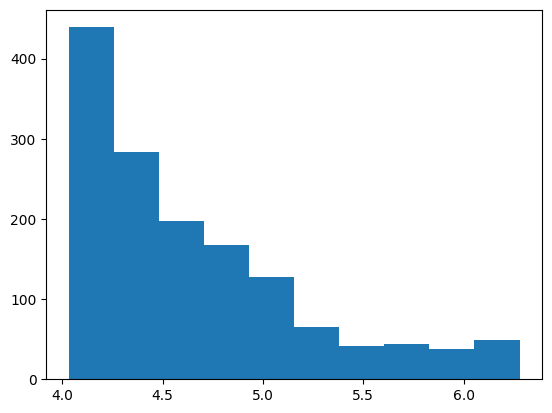

In [12]:
plt.hist(np.log10(final_flares["4-10 keV"]))

# Demonstrate Incorrect File Finding Issue

In [46]:
i=40
tstart = stix_flare_w_files.iloc[i]['start_UTC']
tend = stix_flare_w_files.iloc[i]['end_UTC']
req_id = stix_flare_w_files.iloc[i]['Request IDs']

In [47]:
req_id

'2211110132'

In [48]:
res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)


In [49]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2211115723
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132
2022-11-11 13:54:39.000,2022-11-11 14:00:21.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118828


In [50]:
res_filtered = res["stix"][res["stix"]["Request ID"] == req_id]

/opt/anaconda3/envs/stix_conda/lib/python3.10/site-packages/astropy/table/column.py:330: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


In [51]:
res["stix"][res["stix"]["Request ID"] == req_id]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T133050-20221111T134504_V01_2211115723-54718.fits,2211115723


In [43]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 10:39:32.000,2022-11-11 10:51:20.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T103932-20221111T105120_V01_2211112382-54715.fits,2211112382


In [39]:
res_filtered2 = res["stix"][res["stix"]["Request ID"] == int(req_id)]

In [40]:
res_filtered2

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 10:50:03.000,2022-11-11 11:00:22.000,STIX,L1,SCI,sci-xray-cpd,V01,2211117066


In [41]:
dir()

['Fido',
 'In',
 'Out',
 'STIXClient',
 'Time',
 '_',
 '_10',
 '_12',
 '_15',
 '_18',
 '_21',
 '_23',
 '_24',
 '_25',
 '_26',
 '_28',
 '_29',
 '_30',
 '_31',
 '_32',
 '_34',
 '_36',
 '_38',
 '_40',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'astrospice',
 'columns',
 'earth_coords',
 'exit',
 'flare_peak_times',
 'frames',
 'get_aux_data',
 'get_ipython',
 'get_pixel_data',
 'i',
 'kernals',
 'mask',
 'np',
 'pd',
 'plt',
 'quit',
 'req_id',
 'res',
 'res_filtered',
 'res_filtered2',
 'solo_coords',
 'stix

In [31]:
int(req_id)

2211110132

In [30]:
type(2211110132)

int

In [32]:
res["stix"]["Request ID"] == int(req_id)

array([False,  True, False])

In [27]:
mask = res['stix']["Request ID"] == 2211110132

In [28]:
mask

array([False,  True, False])

In [23]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,url,Request ID
str23,str23,str4,str2,str3,str12,str3,str144,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,http://pub099.cs.technik.fhnw.ch/data/fits/L1/2022/11/11/SCI/solo_L1_stix-sci-xray-cpd_20221111T133050-20221111T134504_V01_2211115723-54718.fits,2211115723


In [83]:
final_flares.iloc[i]

flare_id                                                             2211111346
att_in                                                                    False
GOES_flux                                                              0.000001
start_UTC                                               2022-11-11T13:32:56.086
peak_UTC                                                2022-11-11 13:46:32.087
end_UTC                                                 2022-11-11T13:55:48.088
4-10 keV                                                                  12799
10-15 keV                                                                  3199
number_available_files                                                        1
available_file_request_IDs                                         [2211110132]
solo_lat                                                               9.122204
solo_lon                                                             -22.063143
solo_AU_distance                        

In [82]:
i=40
tstart = final_flares.iloc[i]['start_UTC']
tend = final_flares.iloc[i]['end_UTC']
req_id = final_flares.iloc[i]['Request IDs']

In [67]:
print(tstart,tend)

2022-11-11T10:49:48.069 2022-11-11T11:00:04.070


In [84]:
res = Fido.search(a.Time(tstart, tend), a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)


In [76]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 10:39:32.000,2022-11-11 10:51:20.000,STIX,L1,SCI,sci-xray-cpd,V01,2211112382
2022-11-11 10:50:03.000,2022-11-11 11:00:22.000,STIX,L1,SCI,sci-xray-cpd,V01,2211117066


In [70]:
req_id

2211117066

In [56]:
res['stix']

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 01:24:58.000,2022-11-11 01:40:12.000,STIX,L1,SCI,sci-xray-cpd,V01,2211113411
2022-11-11 01:44:45.000,2022-11-11 01:55:45.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118377


In [85]:
res_filtered = res["stix"][res["stix"]["Request ID"] == req_id]

In [86]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:30:50.000,2022-11-11 13:45:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2211115723
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132
2022-11-11 13:54:39.000,2022-11-11 14:00:21.000,STIX,L1,SCI,sci-xray-cpd,V01,2211118828


In [88]:
res = res["stix"][res["stix"]["Request ID"] == req_id]

In [89]:
res

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


In [87]:
res_filtered

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


# Test (Shane)

In [1]:
from sunpy.net import Fido, attrs as a
from stixpy.net import client


In [2]:

query = Fido.search(a.Time('2022-11-11T13:32:56.086', '2022-11-11T13:55:48.088'), 
                    a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
print(query)


Results from 1 Provider:

3 Results from the STIXClient:

       Start Time               End Time        Instrument Level DataType DataProduct  Ver Request ID
----------------------- ----------------------- ---------- ----- -------- ------------ --- ----------
2022-11-11 13:30:50.000 2022-11-11 13:45:04.000       STIX    L1      SCI sci-xray-cpd V01 2211115723
2022-11-11 13:44:13.000 2022-11-11 13:50:19.000       STIX    L1      SCI sci-xray-cpd V01 2211110132
2022-11-11 13:54:39.000 2022-11-11 14:00:21.000       STIX    L1      SCI sci-xray-cpd V01 2211118828




In [3]:
mask = query['stix']["Request ID"] == 2211110132
print(mask)

[False  True False]


In [4]:
file = Fido.fetch(query['stix'][mask])
print(file)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

solo_L1_stix-sci-xray-cpd_20221111T134413-20221111T135019_V01_2211110132-50214.fits:   0%|          | 0.00/2.8…

['/Users/hannahcollier/sunpy/data/solo_L1_stix-sci-xray-cpd_20221111T134413-20221111T135019_V01_2211110132-50214.fits']


In [8]:
res2 = query["stix"][query["stix"]["Request ID"] == 2211110132]

In [10]:
res2

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2022-11-11 13:44:13.000,2022-11-11 13:50:19.000,STIX,L1,SCI,sci-xray-cpd,V01,2211110132


In [6]:
import stixpy

In [7]:
stixpy.__version__

'0.1.0rc2'